In [8]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [9]:
import numpy as np
import pandas as pd

In [10]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [15]:
# create engine, parameter is location of SQLite database file
engine = create_engine('sqlite:///hawaii.sqlite')
# set up a foundation for us to build on in SQLAlchemy
Base = automap_base()
# reflect the schema from the tables to our code
Base.prepare(engine, reflect=True)
# checks if Automap was able to find all the data in our SQLite database
Base.classes.keys()

['measurement', 'station']

In [16]:
# variables for each key
Measurement = Base.classes.measurement
Station = Base.classes.station

In [17]:
# session link to our database with our code, allows us to query for data
session = Session(engine)

In [ ]:
# reflect an existing database into a new model

# reflect the tables


In [ ]:
# We can view all of the classes that automap found


In [ ]:
# Save references to each table


In [ ]:
# Create our session (link) from Python to the DB


# Exploratory Climate Analysis

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text major ticklabel objects>)

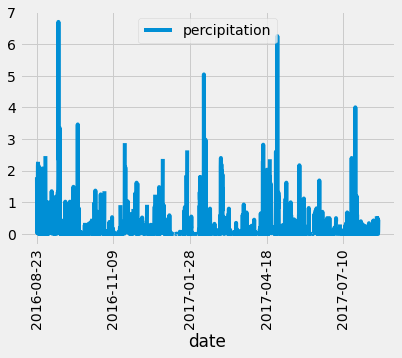

In [31]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#Starting from the last data point in the database. 
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days = 365)
# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# print(results)
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns = ['date', 'percipitation'])
# set index of df to date
df.set_index(df['date'], inplace = True)
# convert dataframe to strings, set index to false
# print(df.to_string(index = False))
# Sort the dataframe by date
df = df.sort_index()
# print(df.to_string(index = False))
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation = 90)

In [32]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [ ]:
# How many stations are available in this dataset?


In [ ]:
# What are the most active stations?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge